In [7]:
# check GPU ok
import torch

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"Number of available GPUs: {device_count}")
    for i in range(device_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPUs available. Running on CPU.")

Number of available GPUs: 1
GPU 0: NVIDIA TITAN RTX


In [8]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [9]:
print(torch.cuda.get_device_name(device))

NVIDIA TITAN RTX


In [10]:
import torch
from PIL import Image
import requests
from lavis.common.registry import registry

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
/mnt/nas2/GrimaRepo/fpcattan/blip2/LAVIS_nav/lavis


In [3]:
# ver dataset zoo
from lavis.datasets.builders import dataset_zoo
dataset_names = dataset_zoo.get_names()
print(sorted(dataset_names))

['aok_vqa', 'aok_vqa_instruct', 'audio_video_discrn', 'audiocaps_mm_caption', 'audiocaps_mm_caption_instruct', 'audiocaps_mm_qa', 'audioset_mm_caption', 'audioset_mm_caption_instruct', 'avsd_dialogue', 'avsd_mm_dialogue_instruct', 'blip_diffusion_finetune', 'capfilt14m', 'capfilt14m_instruct', 'charade_caption', 'charade_caption_instruct', 'clotho_qa', 'clothov2', 'clothov2_instruct', 'coco_caption', 'coco_caption_instruct', 'coco_retrieval', 'coco_vqa', 'coco_vqa_instruct', 'coin_caption', 'coin_caption_instruct', 'conceptual_caption_12m', 'conceptual_caption_12m_instruct', 'conceptual_caption_3m', 'conceptual_caption_3m_instruct', 'didemo_retrieval', 'esc50_cls', 'flickr30k', 'flickr30k_caption', 'flickr30k_caption_instruct', 'gqa', 'gqa_instruct', 'iconqa', 'iconqa_instruct', 'image_pc_discrn', 'imagenet', 'laion2B_multi', 'laion400M', 'laion400M_instruct', 'llava150k_dialogue_instruct', 'modelnet40_cls', 'msrvtt_caption', 'msrvtt_caption_instruct', 'msrvtt_qa', 'msrvtt_qa_instruct'

In [ ]:
# TODO: procesar el json
# TODO: asociarlo a rxr_caption
# TODO: cargar el dataset rxr_caption con load_dataset y ver la imagen cn la caption nueva, luego de procesar el json

### Probando que entra al modelo desde una panorámica o desde una imagen de un viewpoint

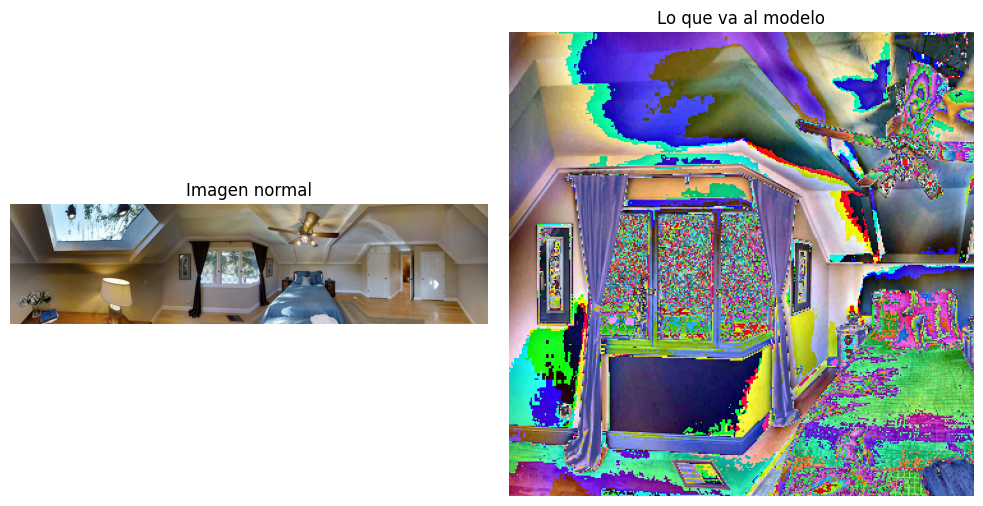

In [30]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import InterpolationMode
import matplotlib.pyplot as plt

image_size = 364
mean = (0.48145466, 0.4578275, 0.40821073)
std = (0.26862954, 0.26130258, 0.27577711)
min_scale = 0.5
max_scale = 1.0

transform = transforms.Compose([
    transforms.RandomResizedCrop(
        image_size,
        scale=(min_scale, max_scale),
        interpolation=InterpolationMode.BICUBIC,
    ),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# Define a function to resize an image using the extracted transform
def resize_image_with_torch(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Apply the transformation
    resized_img = transform(img)
    
    return resized_img

# Define the path to the image
# image_path = "../8388153c198e4e4fb75cd8d0fd96d8a2_skybox4_sami.jpg"  # Replace with the actual path to your image
image_path = "/home/fpcattan/nas2_grima/datasets/8388153c198e4e4fb75cd8d0fd96d8a2_equi180.jpg"
# Open the image
img1 = Image.open(image_path)

# Resize the image using the extracted transform
resized_img = resize_image_with_torch(image_path)

# Convert tensor back to PIL image for visualization
resized_img_pil = transforms.ToPILImage()(resized_img)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axes[0].imshow(img1)
axes[0].set_title('Imagen normal')
axes[0].axis('off')

# Plot the second image
axes[1].imshow(resized_img_pil)
axes[1].set_title('Lo que va al modelo')
axes[1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

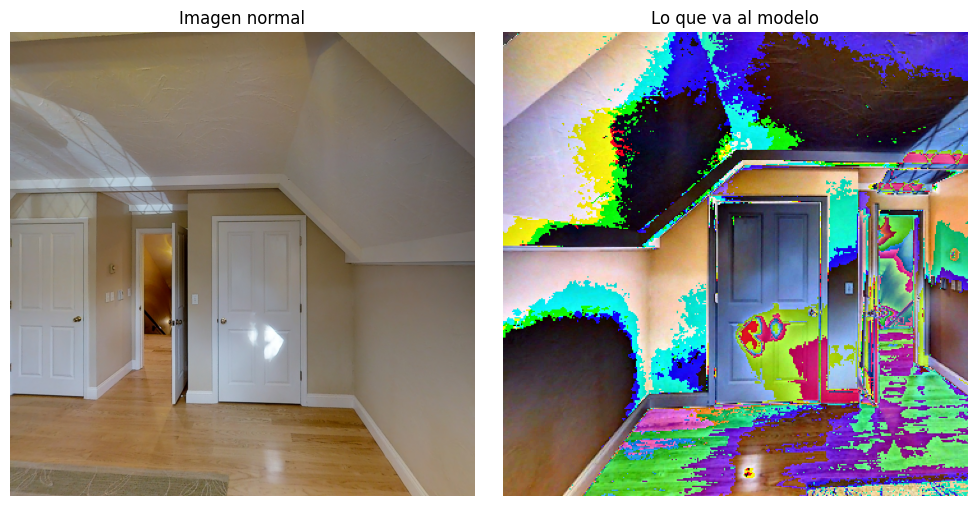

In [38]:

from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import InterpolationMode
import matplotlib.pyplot as plt

image_size = 364
mean = (0.48145466, 0.4578275, 0.40821073)
std = (0.26862954, 0.26130258, 0.27577711)
min_scale = 0.5
max_scale = 1.0

transform = transforms.Compose([
    transforms.RandomResizedCrop(
        image_size,
        scale=(min_scale, max_scale),
        interpolation=InterpolationMode.BICUBIC,
    ),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# Define a function to resize an image using the extracted transform
def resize_image_with_torch(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Apply the transformation
    resized_img = transform(img)
    
    return resized_img

# Define the path to the image
image_path = "/home/fpcattan/nas2_grima/datasets/8388153c198e4e4fb75cd8d0fd96d8a2_skybox4_sami.jpg"
# Open the image
img1 = Image.open(image_path)

# Resize the image using the extracted transform
resized_img = resize_image_with_torch(image_path)

# Convert tensor back to PIL image for visualization
resized_img_pil = transforms.ToPILImage()(resized_img)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axes[0].imshow(img1)
axes[0].set_title('Imagen normal')
axes[0].axis('off')

# Plot the second image
axes[1].imshow(resized_img_pil)
axes[1].set_title('Lo que va al modelo')
axes[1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()